In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data_dir = r"C:\Users\ASUS\OneDrive\Desktop\Prodigy InfoTech Internship\PRODIGY_ML_04\data"

In [3]:
X = []
y = []

In [4]:
subfolders = ["train", "test"]
for sub in subfolders:
    sub_path = os.path.join(data_dir, sub)
    for folder in os.listdir(sub_path):
        folder_path = os.path.join(sub_path, folder)
        if not os.path.isdir(folder_path):
            continue
        try:
            label = int(folder)
        except:
            print("Skipping folder:", folder)
            continue
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, 0)
            if img is None:
                continue
            img = cv2.resize(img, (100, 100))
            img = img.flatten()
            X.append(img)
            y.append(label)
X = np.array(X)
y = np.array(y)
print("Loaded images:", len(X))
print("Labels:", np.unique(y))


Loaded images: 24000
Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [6]:
model = SVC(kernel='rbf', C=10)
model.fit(xtrain, ytrain)

SVC(C=10)

In [7]:
pred = model.predict(xtest)
acc = accuracy_score(ytest, pred)
print("Accuracy:", acc)

Accuracy: 1.0


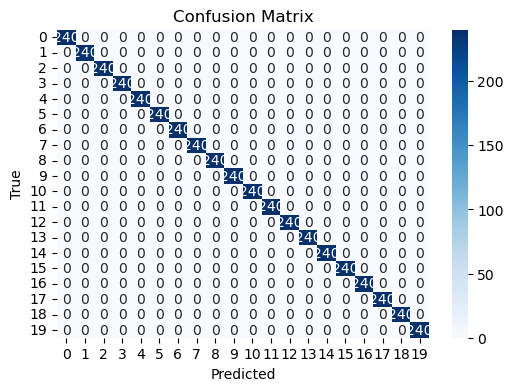

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(ytest, pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [9]:
index = np.random.randint(0, len(xtest))
sample = xtest[index].reshape(100, 100)
true_label = ytest[index]
pred_label = model.predict([xtest[index]])[0]

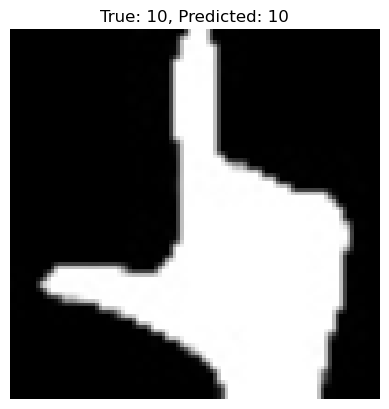

In [10]:
plt.imshow(sample, cmap="gray")
plt.title(f"True: {true_label}, Predicted: {pred_label}")
plt.axis("off")
plt.show()